In [3]:
import matplotlib.pyplot as plt
import pathlib
import math
import numpy as np
from utils import read_im, save_im, normalize
output_dir = pathlib.Path("image_solutions")
output_dir.mkdir(exist_ok=True)

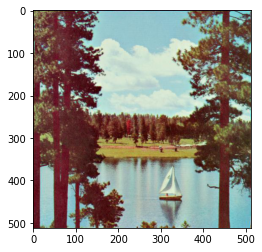

In [4]:
im = read_im(pathlib.Path("images", "lake.jpg"))
plt.imshow(im)

In [5]:
def convolve_pixel_value(colorIndex, im_x, im_y, im, kernel):
    value = 0
    edgeSize = math.floor(len(kernel) / 2)
    for y in range(-edgeSize, edgeSize):
        for x in range(-edgeSize, edgeSize):
            value += kernel[x][y]*im[im_x - x][im_y - y][colorIndex]
    return value
    

def convolve_im(im, kernel,
    ):
    """ A function that convolves im with kernel
    
    Args:
        im ([type]): [np.array of shape [H, W, 3]]
        kernel ([type]): [np.array of shape [K, K]]
    
    Returns:
        [type]: [np.array of shape [H, W, 3]. should be same as im]
    """
    assert len(im.shape) == 3
    
    edgeSize = math.floor(len(kernel) / 2)
    convolved = [[[0, 0, 0] for x in y] for y in im]

    for y in range(edgeSize, len(im) - edgeSize - 1):
        for x in range(edgeSize, len(im[y]) - edgeSize - 1):
            convolved[x][y][0] = convolve_pixel_value(0, x, y, im, kernel)
            convolved[x][y][1] = convolve_pixel_value(1, x, y, im, kernel)
            convolved[x][y][2] = convolve_pixel_value(2, x, y, im, kernel)
            
    
    return np.array(convolved)

In [6]:
# Define the convolutional kernels
h_b = 1 / 256 * np.array([
    [1, 4, 6, 4, 1],
    [4, 16, 24, 16, 4],
    [6, 24, 36, 24, 6],
    [4, 16, 24, 16, 4],
    [1, 4, 6, 4, 1]
])
sobel_x = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
])

# Convolve images
im_smoothed = convolve_im(im.copy(), h_b)
save_im(output_dir.joinpath("im_smoothed.jpg"), im_smoothed)
im_sobel = convolve_im(im, sobel_x)
save_im(output_dir.joinpath("im_sobel.jpg"), im_sobel)

# DO NOT CHANGE. Checking that your function returns as expected
assert isinstance(im_smoothed, np.ndarray),     f"Your convolve function has to return a np.array. " +    f"Was: {type(im_smoothed)}"
assert im_smoothed.shape == im.shape,     f"Expected smoothed im ({im_smoothed.shape}" +     f"to have same shape as im ({im.shape})"
assert im_sobel.shape == im.shape,     f"Expected smoothed im ({im_sobel.shape}" +     f"to have same shape as im ({im.shape})"

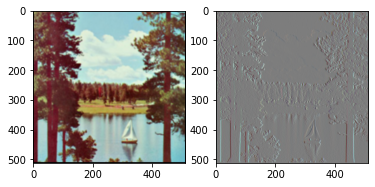

In [7]:
print 

plt.subplot(1, 2, 1)
plt.imshow(normalize(im_smoothed))

plt.subplot(1, 2, 2)
plt.imshow(normalize(im_sobel))